In [1]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load in csv
city_data = r"C:\Users\sitra\Desktop\RUTSOM201710DATA5-Class-Repository-DATA\HW5\Pyber\raw_data/city_data.csv"
ride_data = r"C:\Users\sitra\Desktop\RUTSOM201710DATA5-Class-Repository-DATA\HW5\Pyber\raw_data/ride_data.csv"

city_data_df = pd.read_csv(city_data)
ride_data_df = pd.read_csv(ride_data)
city_data_df.head()

,city,driver_count,type
0,Kelseyland,63,Urban
1,Nguyenbury,8,Urban
2,East Douglas,12,Urban
3,West Dawnfurt,34,Urban
4,Rodriguezburgh,52,Urban


In [3]:
# Merge the two datasets with common data on "city"
combined_car_df = pd.merge(city_data_df, ride_data_df,on="city")
combined_car_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


In [4]:
#city_ride_count=combined_car_df['city'].value_counts()
#city_ride_count.head()


In [5]:
# Open a new column called "Rides" with size attribute of "type" - total rides per city
combined_car_df["Rides"]=combined_car_df.groupby('city')["type"].transform("size")
combined_car_df.head()

,city,driver_count,type,date,fare,ride_id,Rides
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795,28
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333,28
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736,28
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309,28
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829,28


In [11]:
combined_car_copy_df=combined_car_df.copy()

#avg_fare_df=round(combined_car_copy_df.groupby('city')["fare"].mean(),2)
#avg_fare_df.head()


In [12]:
#type=city_data_df["type"].unique()
#print(type)

In [13]:
#type_df=combined_car_copy_df.groupby('city')['type'].unique()
#type_df.head()

In [14]:
#type_df=combined_car_copy_df.groupby('city')['driver_count'].unique()
#type_df.head()

In [15]:
#New Dataframe with groupby mean value of 'fare'
grouped_df =combined_car_copy_df.groupby('city')['fare']
new1_df=pd.DataFrame(round(grouped_df.mean(),2).reset_index(name="Avg Fare"))
new1_df.head()

,city,Avg Fare
0,Alvarezhaven,23.93
1,Alyssaberg,20.61
2,Anitamouth,37.32
3,Antoniomouth,23.62
4,Aprilchester,21.98


In [16]:
#New Dataframe with groupby mean value of 'fare'
grouped_df =combined_car_copy_df.groupby('city')['type']
new2_df=pd.DataFrame(grouped_df.size().reset_index(name="Rides"))
new2_df.head()

,city,Rides
0,Alvarezhaven,31
1,Alyssaberg,26
2,Anitamouth,9
3,Antoniomouth,22
4,Aprilchester,19


In [17]:
combo_df=pd.merge(city_data_df, new1_df,on="city")
combo_df=pd.merge(combo_df,new2_df,on="city")
combo_df.iloc[80:87]

,city,driver_count,type,Avg Fare,Rides
80,Port Michelleview,16,Suburban,26.72,22
81,West Pamelaborough,27,Suburban,33.80,14
82,Sarahview,18,Suburban,33.86,15
83,New Cindyborough,20,Suburban,31.03,13
84,Port James,15,Suburban,31.81,64
85,Port James,3,Suburban,31.81,64
86,New Samanthaside,16,Suburban,34.07,23


In [18]:
# Add a new column 'color' for each 'type' category 
combo_df.loc[combo_df["type"]=="Urban","color"]="lightcoral"
combo_df.loc[combo_df["type"]=="Suburban","color"]="lightskyblue"
combo_df.loc[combo_df["type"]=="Rural","color"]="gold"
combo_df.head()

,city,driver_count,type,Avg Fare,Rides,color
0,Kelseyland,63,Urban,21.81,28,lightcoral
1,Nguyenbury,8,Urban,25.90,26,lightcoral
2,East Douglas,12,Urban,26.17,22,lightcoral
3,West Dawnfurt,34,Urban,22.33,29,lightcoral
4,Rodriguezburgh,52,Urban,21.33,23,lightcoral


In [19]:
# Data on "Port James" city has two rows and seems to be an outlier
highest=combo_df["Rides"].max()
combo_df[combo_df["Rides"]==highest]

,city,driver_count,type,Avg Fare,Rides,color
84,Port James,15,Suburban,31.81,64,lightskyblue
85,Port James,3,Suburban,31.81,64,lightskyblue


In [20]:
max_x=combo_df["Rides"].max()

In [21]:
max_y=combo_df["Avg Fare"].max()

In [22]:
min_y=combo_df['Avg Fare'].min()

In [23]:
# The maximum x value for our chart will be 100
x_limit = max_x

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = combo_df["Rides"]

# Create a random array of data that we will use for our y values
y_axis =combo_df["Avg Fare"] 

# Assign color based on "type" category
color=combo_df["color"]

# Area of markers is proportional to driver count for each city
size=combo_df["driver_count"]



In [24]:
# Tells matplotlib that we want to make a scatter plot
# The size of each point on our plot is determined by their x value
plt.scatter(x_axis, y_axis, marker="o", facecolors=color, edgecolors="k",
            s=size*3, alpha=0.65)

In [25]:
# The y limits of our scatter plot is 0 to 1
plt.ylim(min_y-4.48,max_y +5.39)

(15.039999999999999, 55.009999999999998)

In [26]:
# The x limits of our scatter plot is 0 to 100
plt.xlim(0, x_limit-24)

(0, 40)

In [27]:
# Set a  title and labels
plt.title("Pyber Ride Sharing Data (2016)")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid(b=True, which='both', color='0.75',linestyle='-')

In [28]:
# Create a legend for our chart
#handles=combo_df['type'].unique()
#handles[0]
# plt.legend(handles=handles, loc="best")

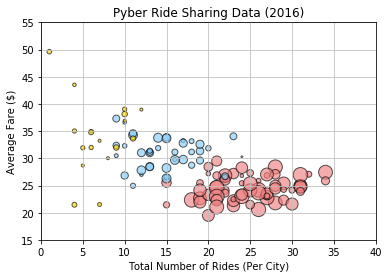

In [29]:
# Prints the scatter plot to the screen
plt.show()

In [10]:
# Total Fares by City Type
# Use groupby to calculate total fare by sum attribute and name the column as 'Total Fare'
grouped_df =combined_car_copy_df.groupby('type')['fare']
new_df=pd.DataFrame(round(grouped_df.sum(),2).reset_index(name="Total Fare"))
new_df.head()

,type,Total Fare
0,Rural,4255.09
1,Suburban,20335.69
2,Urban,40078.34


In [11]:
# DATASET 1
Total_fare = new_df['Total Fare']
Type = new_df["type"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0)

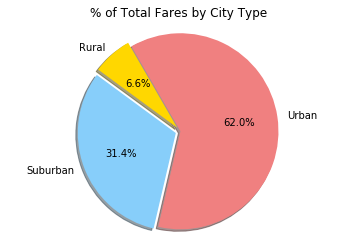

In [12]:
plt.title("% of Total Fares by City Type")
plt.pie(Total_fare, explode=explode, labels=Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

In [13]:
# Total Rides by City Type
# Use groupby to calculate total rides by size attribute and name the column as 'Total Rides'
grouped_df =combined_car_copy_df.groupby('type')['city']
new_df=pd.DataFrame(grouped_df.size().reset_index(name="Total Rides"))
new_df.head()

,type,Total Rides
0,Rural,125
1,Suburban,657
2,Urban,1625


In [14]:
# DATASET 2
Total_rides = new_df['Total Rides']
Type = new_df["type"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0)

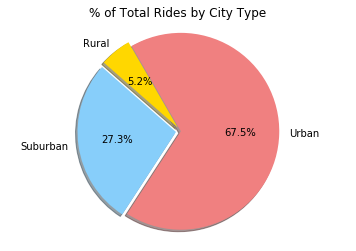

In [15]:
plt.title("% of Total Rides by City Type")
plt.pie(Total_rides, explode=explode, labels=Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=120)
plt.axis("equal")
plt.show()

In [16]:
# Total drivers by City Type
grouped_df =city_data_df.groupby('type')['driver_count']
new_df=pd.DataFrame(grouped_df.sum().reset_index(name="Total Drivers"))
new_df.head()

,type,Total Drivers
0,Rural,104
1,Suburban,638
2,Urban,2607


In [17]:
# DATASET 3
Total_drivers = new_df['Total Drivers']
Type = new_df["type"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0.05, 0.05, 0)

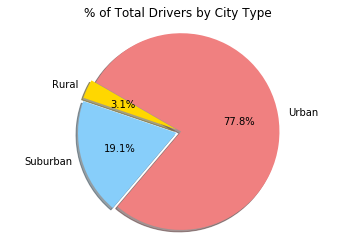

In [18]:
plt.title("% of Total Drivers by City Type")
plt.pie(Total_drivers, explode=explode, labels=Type, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=150)
plt.axis("equal")
plt.show()